# Data exploration

Authors:
    - Luis Blazquez Miñambres
    - Francisco Pinto Santos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read dataset

In [2]:
df = pd.read_csv("spotify-dataset.csv")

### Dataset information

In [3]:
df.info

<bound method DataFrame.info of       Index                   Title                    Artist  \
0         1                 Sunrise               Norah Jones   
1         2             Black Night               Deep Purple   
2         3          Clint Eastwood                  Gorillaz   
3         4           The Pretender              Foo Fighters   
4         5  Waitin' On A Sunny Day         Bruce Springsteen   
...     ...                     ...                       ...   
1989   1990        Heartbreak Hotel             Elvis Presley   
1990   1991               Hound Dog             Elvis Presley   
1991   1992         Johnny B. Goode               Chuck Berry   
1992   1993               Take Five  The Dave Brubeck Quartet   
1993   1994          Blueberry Hill               Fats Domino   

                Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
0         adult standards  2004                     157      30            53   
1              album rock

In [4]:
df.sample(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1041,1042,Worn Down Piano,The Mark & Clark Band,classic rock,1977,112,71,37,-10,13,32,488,10,6,32
310,311,Viva La Vida,Coldplay,permanent wave,2008,138,62,49,-7,11,42,242,9,3,78
1144,1145,Relight My Fire - Single Version,Dan Hartman,disco,1979,120,66,79,-11,33,87,226,1,4,52
355,356,Somewhere Only We Know,Keane,modern rock,2004,172,66,45,-4,8,37,236,8,3,67
829,830,25 or 6 to 4 - 2002 Remaster,Chicago,adult standards,1970,147,91,60,-7,8,72,290,31,6,64


In [5]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


### Missing values
There are no missing values in any variable

In [6]:
df.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [7]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

### Duplicated records
There are no duplicated records in any variable

In [8]:
df.duplicated().sum()

0

# Data cleaning

In [9]:
# merge similar genres and lower the attribute
df['Top Genre'] = (df["Top Genre"].str.strip()).str.lower()

In [10]:
# convert negative values to positive, because the percenption of sound is relative (-N dB == N dB in human ear)
df['Loudness (dB)'] = df['Loudness (dB)'].abs()

# Data representation

### Correlation matrix

<AxesSubplot:>

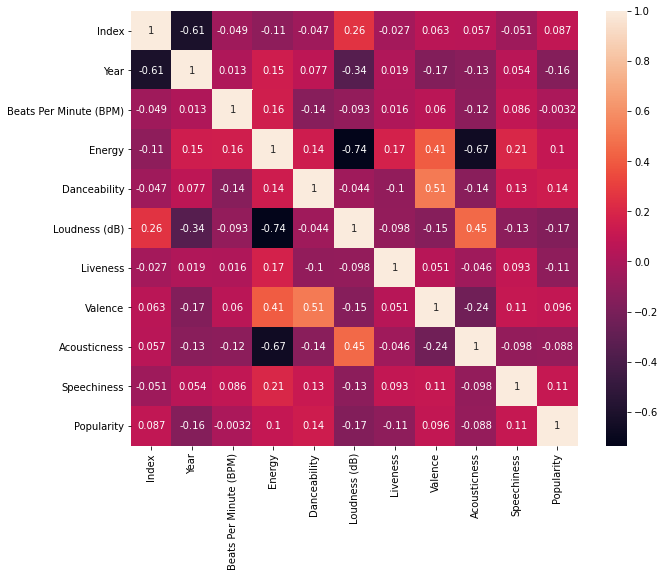

In [11]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)

### Attributes distribution

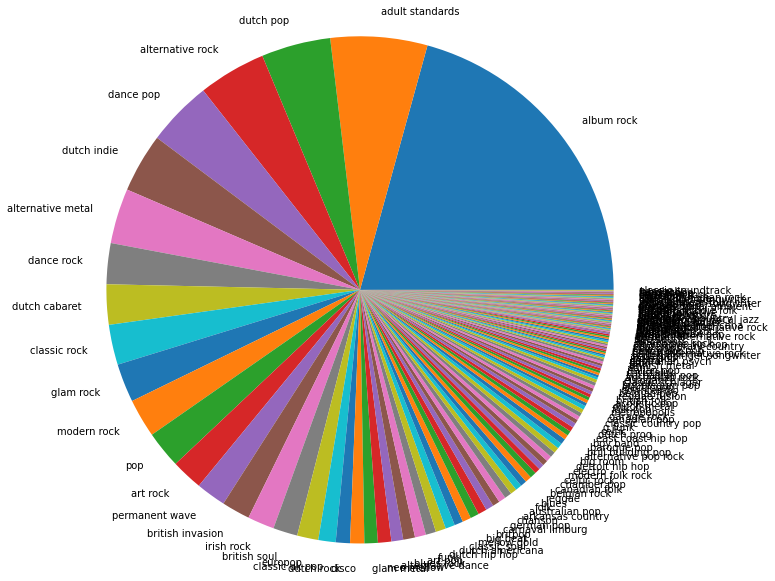

In [12]:
labels = df['Top Genre'].value_counts().index
sizes = df['Top Genre'].value_counts().values
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

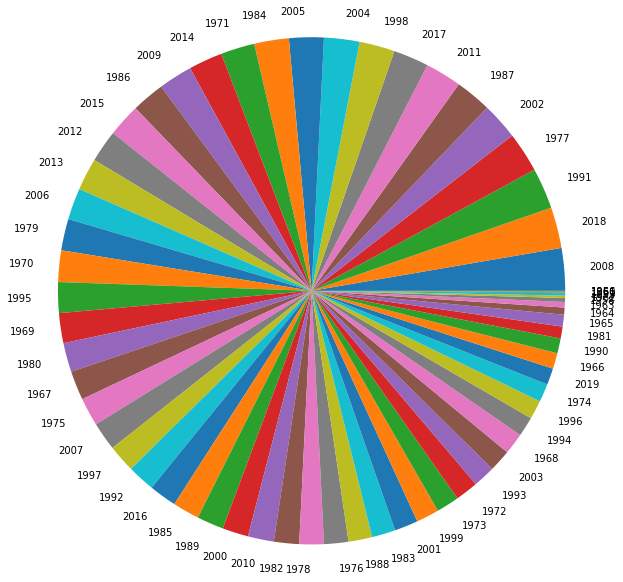

In [13]:
labels = df['Year'].value_counts().index
sizes = df['Year'].value_counts().values
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


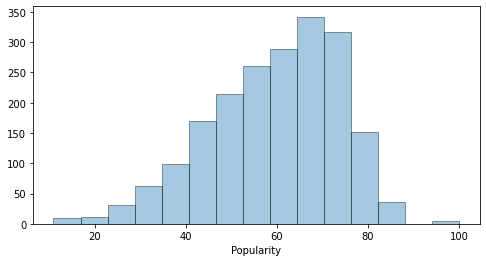

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(df['Popularity'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

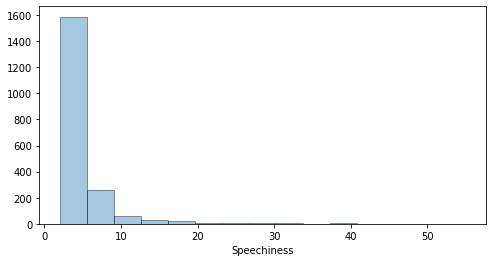

In [15]:
plt.figure(figsize=(8,4))
sns.distplot(df['Speechiness'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

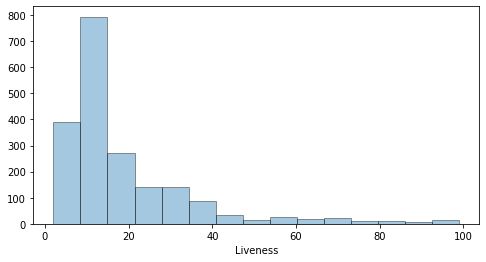

In [16]:
plt.figure(figsize=(8,4))
sns.distplot(df['Liveness'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

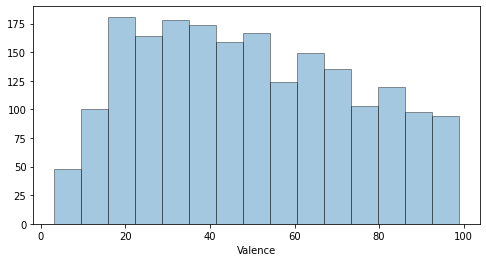

In [17]:
plt.figure(figsize=(8,4))
sns.distplot(df['Valence'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

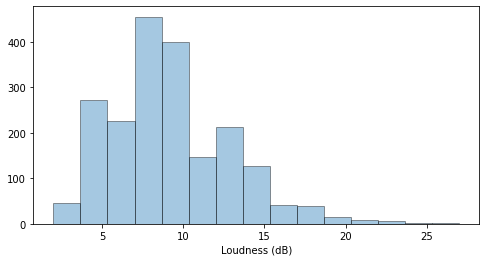

In [18]:
plt.figure(figsize=(8,4))
sns.distplot(df['Loudness (dB)'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

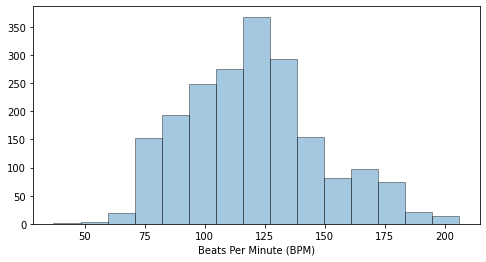

In [19]:
plt.figure(figsize=(8,4))
sns.distplot(df['Beats Per Minute (BPM)'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

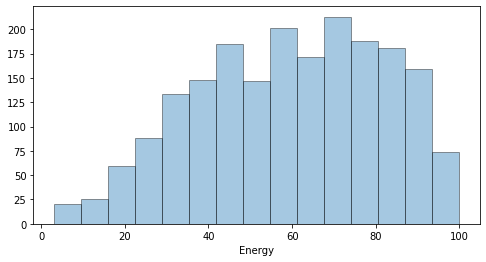

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(df['Energy'], kde=False, bins=15, hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

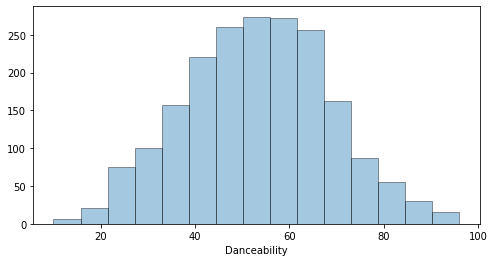

In [21]:
plt.figure(figsize=(8,4))
sns.distplot(df['Danceability'], kde=False, bins=15, hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

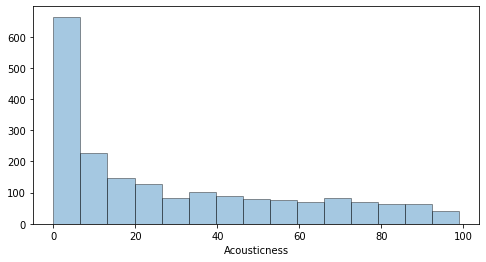

In [22]:
plt.figure(figsize=(8,4))
sns.distplot(df['Acousticness'], kde=False, bins=15, hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()